## Method C: Using Pseudoinverse (SVD)

- Method A is most preffered one


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term column
X_b = np.c_[np.ones((100, 1)), X]

# calculate the moore-penrose pseudoinverse directly
X_b_pinv = np.linalg.pinv(X_b)  # this uses SVD internally

# calculate optimal parameters: θ = X⁺y
theta_best = X_b_pinv.dot(y)

print("\nOptimized parameters")
print(f"θ0 (bias): {theta_best[0][0]:.6f}")
print(f"θ1 (coefficient): {theta_best[1][0]:.6f}")


Optimized parameters
θ0 (bias): 4.215096
θ1 (coefficient): 2.770113


In [2]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

print("\nPredictions for new data:")
for i in range(len(X_new)):
    print(f"x = {X_new[i][0]:.1f} -> predicted y = {y_predict[i][0]:.6f}")


Predictions for new data:
x = 0.0 -> predicted y = 4.215096
x = 2.0 -> predicted y = 9.755323


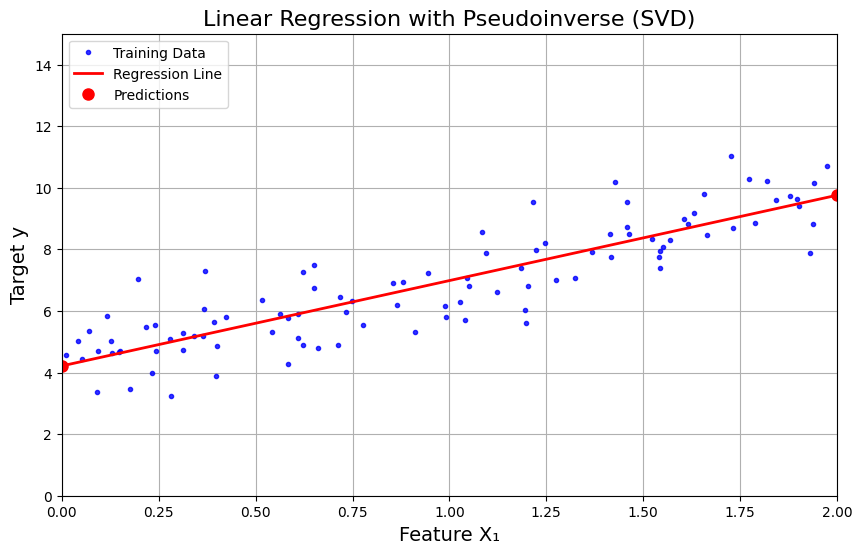

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Training Data", alpha=0.8)
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
X_line_b = np.c_[np.ones((100, 1)), X_line]
y_line = X_line_b.dot(theta_best)
plt.plot(X_line, y_line, "r-", label="Regression Line", linewidth=2)
plt.plot(X_new, y_predict, "ro", label="Predictions", markersize=8)
plt.xlabel("Feature X₁", fontsize=14)
plt.ylabel("Target y", fontsize=14)
plt.title("Linear Regression with Pseudoinverse (SVD)", fontsize=16)
plt.legend(loc="upper left")
plt.grid(True)
plt.axis([0, 2, 0, 15])
plt.show()